## Bucket sort 

In [2]:
import random
import time
import matplotlib.pyplot as plt

List maken met len van 5 en random numbers vanaf 0 t/m 999.

In [6]:
def list_generator(lenList):
    """
    Vullen van lijst met meegegeven lengte.
    Waardes zitten tussen de -1000 en 1000.
    """
    shuffledList = []
    for i in range(lenList):
        n = random.randint(-999,999)
        shuffledList.append(n)
    return shuffledList

In [7]:
shuffledList = list_generator(10)

Aanmaken van lijsten met positieve getallen en negatieve getallen, negatieve getallen ook positief maken voor de sort

In [8]:
def split_list(shuffledList):
    """
    Splitten van lijst in negatieve lijst en een positieve lijst.
    
    """
    shuffledListPosi = []
    shuffledListNega = []
    for i in shuffledList:
        if i < 0:
            shuffledListNega.append(i * -1)
        else:
            shuffledListPosi.append(i)
    return shuffledListPosi, shuffledListNega

For loop waarin ik door de shuffledList loop om ze te sorteren.

In [9]:
def bucket_sort(shuffledList, lenLongestNum):
    """
    Functie die de lijst sorteert door middel van de bucket sort.
    """
    #Aantal passes is de lengte van het grootse getal.
    for passes in range (lenLongestNum):
        #List maken met 10 lege lists.
        sortList = [[] for i in range(10)]

        #loopen door de random generated list.
        for i in shuffledList:
            #Als een getal kleiner is dan het grootste getal zal de index onder 0 komen.
            if len(str(i)) - (passes + 1) >= 0:
                sortList[int(str(i)[len(str(i)) - (passes + 1)])].append(i)
            else:
                sortList[0].append(i)

        #Legen van de lijst en het vullen met de eerste pass
        shuffledList.clear()
        for x in sortList:
            shuffledList.extend(x)
    return shuffledList

Aanroepen van functies en samenvoegen van lijsten.

In [10]:
def sort_list(shuffledListPosi, shuffledListNega):
    """
    Aanroepen van de functies en een resultaat maken hiervan.
    """
    #aanmaken variabelen lengte van grootste getal, lijst leeg is 0
    lenLongestNumPosi = len(str(max(shuffledListPosi))) if len(shuffledListPosi) > 0 else 0
    lenLongestNumNega = len(str(max(shuffledListNega))) if len(shuffledListNega) > 0 else 0
    
    sortedPosi = bucket_sort(shuffledListPosi, lenLongestNumPosi)
    sortedNega = bucket_sort(shuffledListNega, lenLongestNumNega)

    #Terug negatief maken van de list
    sortedNega = [-x for x in sortedNega]
    sortedNega.reverse()

    #Samenvoegen van Negatieven list en Positieven list
    sortedNega.extend(sortedPosi)
    return  sortedNega

In [11]:
def calc_time(posiList , negaList):
    """
    Berekenen van tijdsduur door middel van begintijd en eindtijd van het proces.
    """
    beginTime = time.time()
    
    sort_list(posiList, negaList)
    
    endTime = time.time()
    return endTime - beginTime

In [12]:
#geef gesplitste lijst mee aan sort list
splittedLists = split_list(shuffledList)
calc_time(splittedLists[0] ,splittedLists[1])
# sort_list(splittedLists[0] ,splittedLists[1])

0.0

__De runtime complexiteit__ 

In [26]:
def generate_lists():
    """
    Maken van een lijst met daarin 3 random lists van lengte 1.000, 10.000, 30.000
    """
    lenghtslist, random_lijst = [1000, 10000, 30000], []

    for i in lenghtslist:
        shuffledList = list_generator(i)
        random_lijst.append(shuffledList)
    return random_lijst

In [27]:
def test_runtime(random_lijst):
    """
    Vullen van dictionary met daarin de runtime voor iedere soort lengte lijst.
    """
    times = {}
    for i in range(len(random_lijst)):
        splittedLists = split_list(shuffledList)
        time = (calc_time(splittedLists[0] ,splittedLists[1]))
        times[len(random_lijst[i])] = time
    return times

bucket sort runnen met random lijsten

In [28]:
lijst = generate_lists()
dictTime = test_runtime(lijst)
print(dictTime)

{1000: 0.0, 10000: 0.0, 30000: 0.0}


plot de tijd voor het sorteren van de 3 lijsten

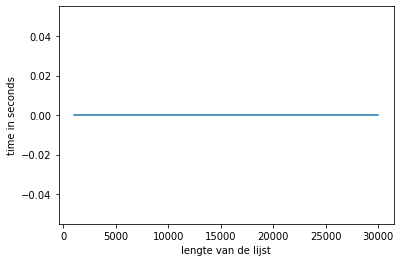

[(1000, 0.0), (10000, 0.0), (30000, 0.0)]


In [29]:
plt.plot(list(dictTime.keys()), list(dictTime.values()))
plt.ylabel('time in seconds')
plt.xlabel('lengte van de lijst')
plt.show()
print(list(dictTime.items()))

bucket sort runnen met dezelfde random lijsten maar dan reversed

In [30]:
dictTimeRev = test_runtime([i[::-1] for i in lijst])
print(dictTimeRev)

{1000: 0.0, 10000: 0.0, 30000: 0.0}


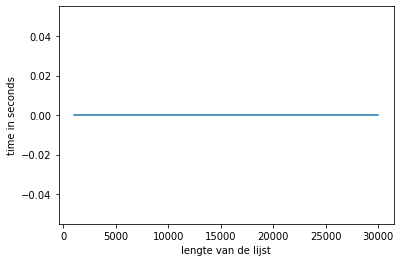

[(1000, 0.0), (10000, 0.0), (30000, 0.0)]


In [31]:
plt.plot(list(dictTimeRev.keys()), list(dictTimeRev.values()))
plt.ylabel('time in seconds')
plt.xlabel('lengte van de lijst')
plt.show()
print(list(dictTimeRev.items()))

Conclusie:
Het maakt niet heel erg veel uit hoe een lijst er uit ziet want de complexiteit van het algoritme blijft ongeveer linear.

__Ruimte analyse__

random generated list wordt opgesplitst in een lijst van positieven en een lijst van negatieven getallen en dat is 2N.
Van deze 2 lijsten worden de lengte van de grootste getallen gepakt, dit is ook 2N. Dit heb je nodig om te weten hoevaak je moet loopen en dat is een K.
Dan worden de twee lijsten apart gesorteerd door de bucket sort, dit is NK. 
Vervolgens worden de lijsten gemerged en dat is een N.



Ofterwijl best case scenario is O(2N+2N+K+NK+N) = O(5N+K+NK)


De wors case is in dit geval nog afhankelijk van de len van de langste getal en bijvoorbeld of er nog positieven en negatieve getallen in de lijst zitten. 

Volgens mij is dit algotitme best linear. Dat kunnen we concluderen op basis van de tijd analyse. 
In Big O notatie is dit een O(n)